In [42]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# load the data
data = pd.read_csv('uw_dining_data.csv')
data.head()

,Date,Time,Charge,Balance,Location
0,2025-JUL-07,12:21 PM,12.00,1164.60,Local Point
1,2025-JUL-07,03:26 PM,7.45,1157.15,Starbucks LS - Suzzallo
2,2025-JUL-07,06:40 PM,15.00,1142.15,Local Point
3,2025-JUL-08,10:39 AM,14.35,1127.80,Starbucks LS - Suzzallo
4,2025-JUL-08,05:35 PM,15.00,1112.80,Local Point


In [44]:
# do data cleaning
data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce')
data.head()

# convert to numpy arrays (vectors, matrices)
dates = data['Date'].values
balance = data['Balance'].values

C:\Users\user\AppData\Local\Temp\ipykernel_3788\1477358827.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce')


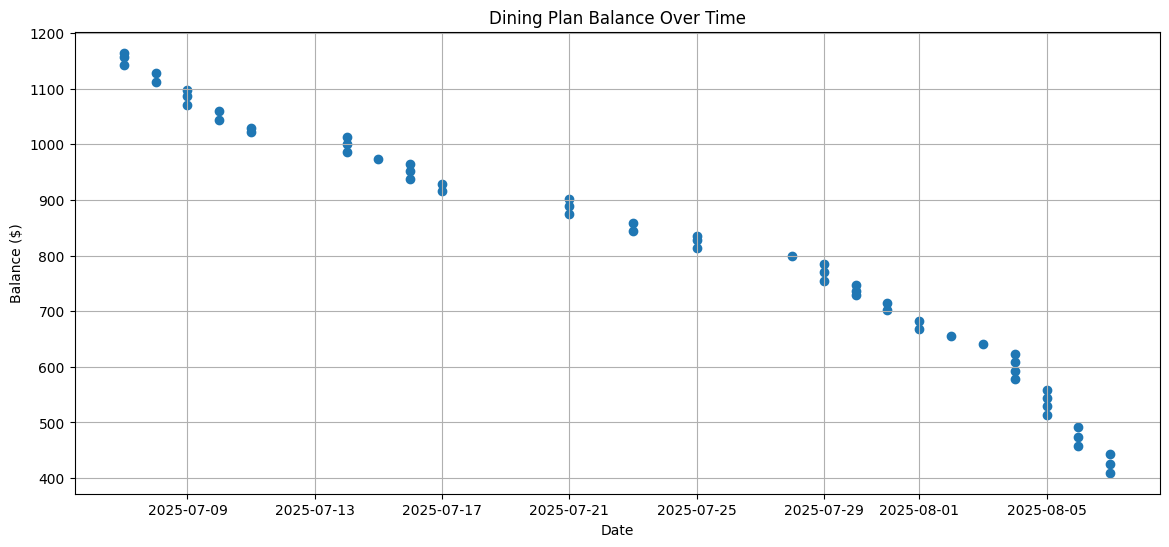

In [45]:
# plot the data
plt.figure(figsize=(14,6))
plt.scatter(dates, balance)
plt.title('Dining Plan Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Balance ($)')
plt.grid()
plt.show()

In [48]:
# compute correlation between two variables to make sure a linear model is appropriate
# We notice the correlation between the two is around 0.97 and it's negative so their linear association
# is strong and negative.
data['Balance'].corr(data['Date'])


np.float64(-0.9795982551899881)

In [ ]:
# convert dates to numbers so we can fit a model
t = pd.to_datetime(dates)
t = (t - t.min()) / np.timedelta64(1, 'D') # days since first date
t = np.array(t)
m = len(t)

# get b vector which is balances
b = balance

print(t)
print(b)

[ 0.  0.  0.  1.  1.  2.  2.  2.  3.  3.  4.  4.  7.  7.  7.  8.  9.  9.
  9. 10. 10. 14. 14. 14. 16. 16. 18. 18. 18. 21. 22. 22. 22. 23. 23. 23.
 24. 24. 25. 25. 26. 27. 28. 28. 28. 28. 29. 29. 29. 29. 30. 30. 30. 31.
 31. 31.]
[1164.6  1157.15 1142.15 1127.8  1112.8  1098.45 1086.45 1071.45 1059.45
 1044.45 1028.7  1021.25 1012.25 1000.25  985.25  973.25  964.25  952.25
  937.25  928.25  916.25  901.9   889.22  874.22  858.77  844.42  835.42
  827.97  812.97  798.62  784.27  769.71  754.71  747.81  735.95  728.5
  714.15  702.15  683.13  667.68  655.22  641.33  622.31  607.96  592.51
  577.51  558.49  544.14  528.69  513.69  492.02  473.    458.    443.65
  424.96  409.51]


In [33]:
# formulate the least squares problem
A = np.vstack([np.ones(m),t]).T
A.shape

(56, 2)

In [ ]:
# solve least squares problem to find optimal parameters for model 

# method 1 using np.linalg.solve (uses normal equations)
theta_GE = np.linalg.solve(A.T @ A, A.T @ b)

# method 2 using QR decomposition (uses QR decomposition)
Q, R = np.linalg.qr(A)
theta_QR = np.linalg.solve(R, Q.T @ b)

# method 3 using np.linalg.lstsq (uses SVD decomposition)
theta_lstsq, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print('theta_GE = ', theta_GE)
print('theta_QR = ', theta_QR)
print('theta_lstsq = ', theta_lstsq)

theta = theta_QR # pick one method

theta_GE =  [1146.42330864  -20.06482551]
theta_QR =  [1146.42330864  -20.06482551]
theta_lstsq =  [1146.42330864  -20.06482551]


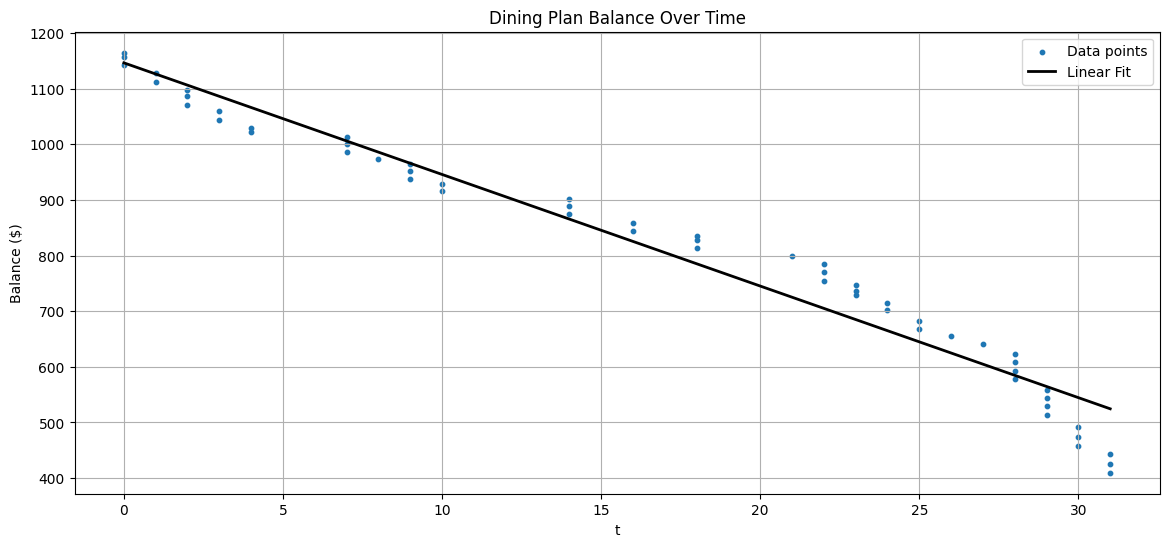

In [51]:
# plot linear fit

plt.figure(figsize=(14,6))
plt.scatter(t, b, label = "Data points", s = 10)
plt.plot(t, A @ theta, label = "Linear Fit", color = "black", linewidth = 2)
plt.title('Dining Plan Balance Over Time')
plt.xlabel('t')
plt.ylabel('Balance ($)')
plt.legend()
plt.grid()
plt.show()

In [53]:
# What is the total average balance change over the time period of data?
total_change = theta[1] * m
total_change

np.float64(-1123.6302286864257)